In [ ]:
import ssms
from ssms.basic_simulators import simulator
import os

# print(list(ssms.config.model_config.keys())[:10])
# print(ssms.config.model_config['ddm'])

sim_out = simulator.simulator(
    model="ddm",
    theta={"v": 0.5, "a": 1, "z": 0.5, "t": 0.5},
    n_samples=10,
    no_noise=False,
)

print(sim_out)

In [ ]:
print(sim_out["choices"])

In [ ]:
import matplotlib.pyplot as plt

filt_value = [
    value for value in sim_out["metadata"]["trajectory"] if -1 < value[0] < 1
]  # save it in a list
# for value in sim_out['metadata']['trajectory']:
#     print(value[0])
plt.plot(filt_value)

These are the ratios [5.    4.    3.    2.    1.    0.025 0.025 0.025 0.025 0.025 0.025 0.025
 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025
 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025
 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025
 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025
 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025
 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025
 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025
 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025
 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025
 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025
 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025
 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025
 0.025 0.025 0.025 0.025 0.025

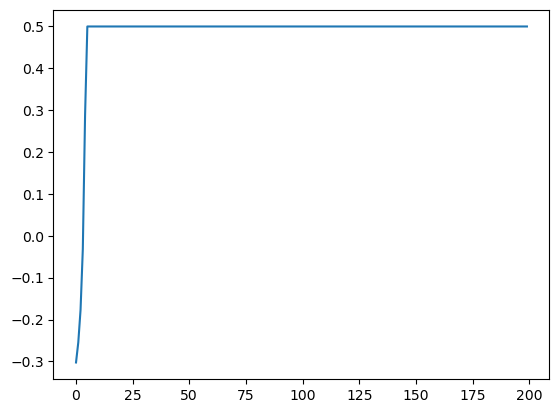

In [24]:
import drift_functions as df
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0, 200, 1)
p_outer = -0.5
p_inner = -0.5
p_target = 0.5
r = 0.4
sda_initial = 2


v_t_list = []
sda_list = []


v_t = df.attend_drift(
    t=t,
    p_target=p_target,
    p_outer=p_outer,
    p_inner=p_inner,
    r=r,
    sda=sda_initial,
)

new_vt = np.insert(v_t, 0, 0.5)
print(v_t)
print(new_vt)
plt.plot(v_t)
# v_t_list.append(v_t)
# sda_list.append(sda_initial)
#
# v_t_array = np.array(v_t_list)
# sda_array = np.array(sda_list)


# plt.subplot(2, 1, 1)
# plt.plot(t, v_t_array, label='v_t')
# plt.xlabel('Time')
# plt.ylabel('v_t')
# plt.title('v_t over Time')
# plt.legend()
#
#
# plt.subplot(2, 1, 2)
# plt.plot(t, sda_array, label='sda', color='orange')
# plt.xlabel('Time')
# plt.ylabel('sda')
# plt.title('sda over Time')
# plt.legend()
#
# plt.tight_layout()
# plt.show()

In [22]:
import ssms
import numpy as np

from ssms.basic_simulators import simulator

sim_out2 = simulator.simulator(
    model="shrink_spot",
    theta=[1.0, 0.5, 0.25, 0.5, -0.5, -0.5, 0.8, 2],
    # [0, 0.19, 0.5, 0.45, -0.55, -0.55, 0.55, 0.026, 2.6,1]
    n_samples=1000,
    no_noise=True,
)
print(sim_out2["metadata"]["simulator"])

Boundary Dict: {'boundary_params': {}, 'boundary_fun': <function constant at 0x0000023A399815A0>, 'boundary_multiplicative': True}
This is the sim param dict: {'max_t': 20, 's': 0.0, 'n_samples': 1000, 'n_trials': 1, 'delta_t': 0.001, 'random_state': None, 'return_option': 'full', 'smooth': True}
These are the ratios [2.5       2.4989998 2.498     ... 0.0125    0.0125    0.0125   ]
 These are the sdas: [2.     1.9992 1.9984 ... 0.01   0.01   0.01  ]
This is a_outer: [0.22662735 0.22653699 0.22644656 ... 0.         0.         0.        ]
This is a_inner: [0.17466632 0.174718   0.17476973 ... 0.         0.         0.        ]
This is a_target: [0.19741265 0.19749002 0.19756743 ... 1.         1.         1.        ]
ddm_flex_no_v


In [ ]:
help(simulator.simulator)

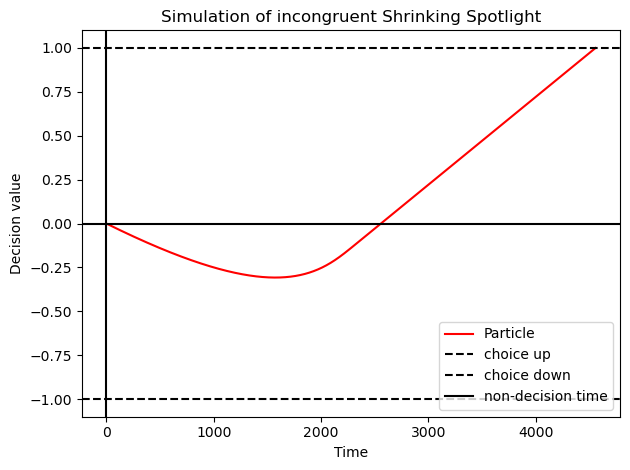

In [23]:
import matplotlib.pyplot as plt

filt_value = [
    value for value in sim_out2["metadata"]["trajectory"] if -1 < value[0] < 1
]  # save it in a list
# plt.plot(v_t)
plt.plot(filt_value, color="red", label="Particle")
plt.title("Simulation of incongruent Shrinking Spotlight")
plt.xlabel("Time")
plt.ylabel("Decision value")
plt.axhline(y=1, label="choice up", color="black", linestyle="--")
plt.axhline(y=-1, label="choice down", color="black", linestyle="--")
plt.axhline(y=0, color="black")
plt.axvline(x=0.5, label="non-decision time", color="black", linestyle="-")
plt.tight_layout()
plt.legend()

In [ ]:
from ssms.basic_simulators import simulator

sim_out2 = simulator.simulator(
    model="shrink_spot",
    theta={"v": 0, "a": 1, "z": 0.5, "t": 0.5},
    n_samples=1000,
    no_noise=False,
)

print(np.mean(sim_out2["rts"]))

In [ ]:
import ssms

list(ssms.config.model_config.keys())[:]

In [ ]:
import drift_functions as df
import numpy as np
import matplotlib.pyplot as plt


gamma_drift = df.gamma_drift(t=np.arange(0, 10, 0.001), shape=2, scale=0.01, c=1.5)
plt.plot(gamma_drift)